#### Question: How well can we predict the customer churn based on the Services they subscribed to ?

##### Expectations:
Predicting customer churn based on the services they subscribe to can be very useful for a telecommunications company. By identifying which services are more strongly associated with churn, the company can take targeted actions to improve those services or offer incentives to encourage customers to keep them. This information can also help the company to develop more targeted marketing campaigns to promote the services that are less likely to lead to churn. Additionally, the insights gained from this analysis can be used to inform future product development and service offerings, helping the company to better meet the needs and preferences of its customers.


##### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn_services.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. This company provides 8 services:
1. Phone Service
2. Multiple Lines
3. Internet Service
4. online security
5. online backup
6. Device Protection Plan
7. Premium Tech Support
8. Unlimited Data

#### EDA:

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Load the dataset from ../Dataset/Telco_customer_churn_services.xlsx
dataset1 = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [4]:
# we need to get a column from another excel file and join it with the dataset

# Load the data from /Dataset/Telco_customer_churn.xlsx
dataset2 = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [5]:
# rename the column to match the column name in the dataset
dataset2.rename(columns={'CustomerID':'Customer ID'}, inplace=True)

In [6]:
# Join the two datasets on the column 'Customer ID'
dataset = pd.merge(dataset1, dataset2, on='Customer ID')

In [7]:
dataset.columns

Index(['Customer ID', 'Count_x', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service_x',
       'Avg Monthly Long Distance Charges', 'Multiple Lines_x',
       'Internet Service_x', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security_x', 'Online Backup_x', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV_x', 'Streaming Movies_x',
       'Streaming Music', 'Unlimited Data', 'Contract_x',
       'Paperless Billing_x', 'Payment Method_x', 'Monthly Charge',
       'Total Charges_x', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Count_y', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service_y', 'Multiple Lines_y', 'Internet Service_y',
       'Online Security_y', 'Online Backup_y', 'Device Protection',
       'Tech Sup

In [8]:
my_columns = ['Phone Service_x', 'Internet Service_x', 'Multiple Lines_x',
              'Online Security_x', 'Online Backup_x', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data', 'Churn Value']

dataset = dataset[my_columns]

In [9]:
# Check for messing values
dataset.isnull().sum()

Phone Service_x           0
Internet Service_x        0
Multiple Lines_x          0
Online Security_x         0
Online Backup_x           0
Device Protection Plan    0
Premium Tech Support      0
Unlimited Data            0
Churn Value               0
dtype: int64

In [11]:
# rename the columns with _x to remove the _x
if 'Phone Service_x' in dataset.columns:
    dataset.rename(columns={'Phone Service_x':'Phone Service', 'Internet Service_x':'Internet Service', 'Multiple Lines_x':'Multiple Lines',
                        'Online Security_x':'Online Security', 'Online Backup_x':'Online Backup'}, inplace=True)

In [12]:
dataset.columns

Index(['Phone Service', 'Internet Service', 'Multiple Lines',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Unlimited Data', 'Churn Value'],
      dtype='object')

In [13]:
# check the data types
dataset.dtypes

Phone Service             object
Internet Service          object
Multiple Lines            object
Online Security           object
Online Backup             object
Device Protection Plan    object
Premium Tech Support      object
Unlimited Data            object
Churn Value                int64
dtype: object

In [14]:
## turn the categorical variables into dummy variables
dataset = pd.get_dummies(dataset)

# check the data types of the columns
dataset.dtypes

Churn Value                   int64
Phone Service_No              uint8
Phone Service_Yes             uint8
Internet Service_No           uint8
Internet Service_Yes          uint8
Multiple Lines_No             uint8
Multiple Lines_Yes            uint8
Online Security_No            uint8
Online Security_Yes           uint8
Online Backup_No              uint8
Online Backup_Yes             uint8
Device Protection Plan_No     uint8
Device Protection Plan_Yes    uint8
Premium Tech Support_No       uint8
Premium Tech Support_Yes      uint8
Unlimited Data_No             uint8
Unlimited Data_Yes            uint8
dtype: object

In [15]:
# keep _yes columns and drop the _no columns
if 'Phone Service_No' in dataset.columns:
    dataset = dataset.drop(['Phone Service_No', 'Internet Service_No', 'Multiple Lines_No', 'Online Security_No', 
                        'Online Backup_No','Device Protection Plan_No','Premium Tech Support_No','Unlimited Data_No'], axis=1)


In [16]:
# rename the columns with _yes to remove the _yes
if 'Phone Service_Yes' in dataset.columns:
    dataset.rename(columns={'Phone Service_Yes':'Phone Service', 'Internet Service_Yes':'Internet Service', 'Multiple Lines_Yes':'Multiple Lines',
                        'Online Security_Yes':'Online Security', 'Online Backup_Yes':'Online Backup','Device Protection Plan_Yes':'Device Protection Plan',
                        'Premium Tech Support_Yes':'Premium Tech Support','Unlimited Data_Yes':'Unlimited Data'}, inplace=True)

In [17]:
# check the head of the dataset
dataset.head()

,Churn Value,Phone Service,Internet Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data
0,1,0,1,0,0,0,1,0,0
1,1,1,1,1,0,1,0,0,1
2,1,1,1,1,0,0,0,0,1
3,1,1,1,0,0,1,1,0,1
4,1,1,1,1,0,0,0,0,1


<AxesSubplot:xlabel='Churn Value', ylabel='count'>

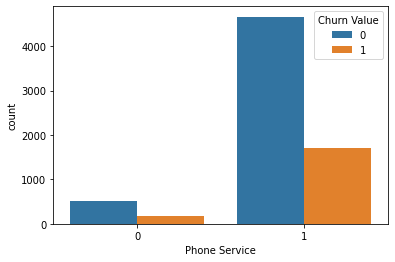

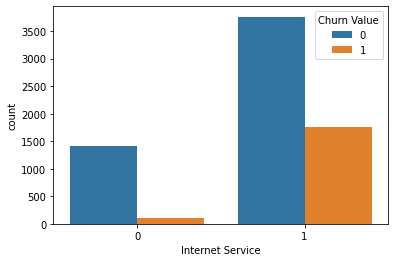

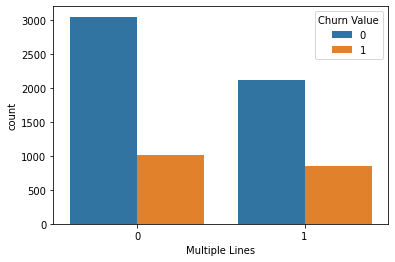

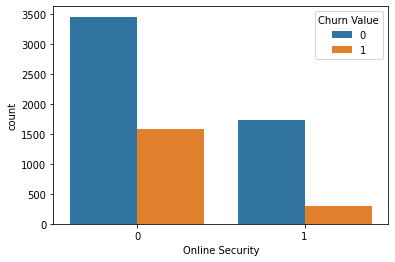

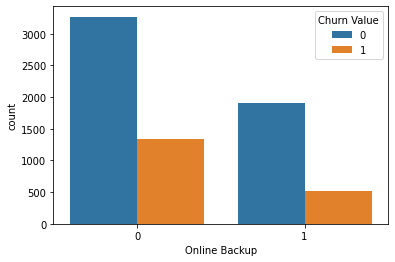

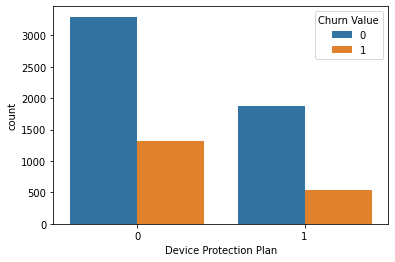

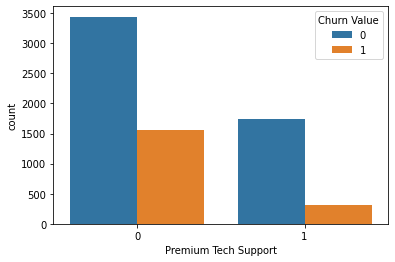

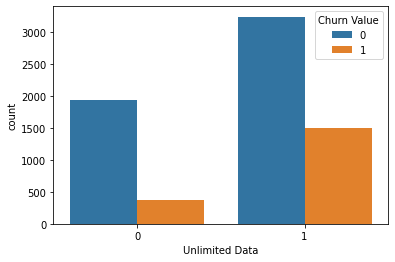

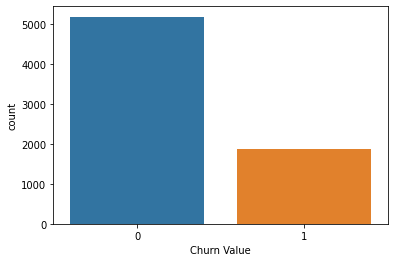

In [19]:
# visualize the distribution of the different services vs the churn value
plt.figure()
sns.countplot(x='Phone Service', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Internet Service', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Multiple Lines', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Online Security', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Online Backup', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Device Protection Plan', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Premium Tech Support', hue='Churn Value', data=dataset)

plt.figure()
sns.countplot(x='Unlimited Data', hue='Churn Value', data=dataset)

# check the distribution of the target variable
plt.figure()
sns.countplot(x='Churn Value', data=dataset)
